In [32]:
# Import standard libraries
import os
from contextlib import redirect_stdout

import sys
# append coeqwal packages to path
sys.path.append('./coeqwalpackage')

import numpy as np
import pandas as pd
import datetime as dt


In [33]:
# Import custom libraries
# Note: on my computer the next import doesn't work the first time I call it, why? If I re-run the cell, then it is ok. MUST DEBUG
from coeqwalpackage.metrics import *
import cqwlutils as cu
import plotting as pu

## Define contol file name

In [34]:
CtrlFile = 'CalSim3DataExtractionInitFile_v2.xlsx'
CtrlTab = 'Init'

## Read from control file

In [35]:
DssListFile, DssListTab, DssListPath, DssNamesOutPath, DssIndicesOutPath, DssDirsOutPath, VarListPath, VarListFile, VarListTab, VarOutPath, DataOutPath, ConvertDataOutPath, ExtractionSubPath, ModelSubPath, GroupDataDirPath, ScenarioDir, DssMin, DssMax, DirMin, DirMax, IndexMin, IndexMax, StartMin, StartMax, EndMin, EndMax, VarMin, VarMax = cu.read_init_file(CtrlFile, CtrlTab)

## Continue with original notebook

## Plotting functions will have to be modified to take in an optional scenario list (e.g. to compare only two scenarios) and a date range (e.g. to zoom into a drought year)

### Read in Data

In [36]:
df, dss_names = read_in_df(ConvertDataOutPath,DssNamesOutPath)
df.head()

A                    CALSIM                                   \
B          COREQSACDV_s0001 CO_EC_MONTH_s0001 C_AMR004_s0001   
C                      FLOW          SALINITY        CHANNEL   
D                      1MON              1MON           1MON   
E                    L2020A            L2020A         L2020A   
F                  PER-AVER          PER-AVER       PER-AVER   
Units                   CFS          UMHOS/CM            CFS   
1921-10-31           0.0000         2173.8489      2164.7295   
1921-11-30           0.0000         2621.5984      2206.7960   
1921-12-31        4017.6848         5590.7207      2024.8998   
1922-01-31           0.0000        10744.2570      1704.5483   
1922-02-28           0.0000         3148.9802      5005.4834   

A                                                                      \
B                C_AMR004_ADD_s0001 C_CAA003_s0001 C_CAA003_CVP_s0001   
C          FLOW-ADDITIONAL-INSTREAM        CHANNEL      FLOW-DELIVERY   
D                              1MON           1MON               1MON   
E                            L2020A         L2020A             L2020A   
F                          PER-AVER       PER-AVER           PER-AVER   
Units                           CFS            CFS                CFS   
1921-10-31                1664.7295      2128.5490             0.0000   
1921-11-30                1706.7959      5519.2420          2043.4584   
1921-12-31                1524.8998      7353.6895             0.0000   
1922-01-31                1454.5483      2900.1606             0.0000   
1922-02-28                4755.4834      4465.3560             0.0000   

A                                                                           \
B          C_CAA003_SWP_s0001 C_CHW017_s0001 C_CLV004_s0001 C_DMC000_s0001   
C               FLOW-DELIVERY        CHANNEL        CHANNEL        CHANNEL   
D                        1MON           1MON           1MON           1MON   
E                      L2020A         L2020A         L2020A         L2020A   
F                    PER-AVER       PER-AVER       PER-AVER       PER-AVER   
Units                     CFS            CFS            CFS            CFS   
1921-10-31          1960.6274       0.000000       0.958765       801.8536   
1921-11-30          3475.7837       0.084717       0.046577      4600.0000   
1921-12-31          7353.6895       6.398305     179.059230      4600.0000   
1922-01-31          2900.1606       6.022529      39.173940      4350.2407   
1922-02-28          4465.3560     304.058170    1826.492400      4600.0000   

A           ...                          CALCULATED                   \
B           ... DEL_SWP_TOTA_s0016 DEL_NOD_AG_s0016 DEL_SOD_AG_s0016   
C           ...       DELIVERY-SWP    DELIVERY-CALC    DELIVERY-CALC   
D           ...               1MON             1MON             1MON   
E           ...             L2020A           L2020A           L2020A   
F           ...           PER-AVER         PER-AVER         PER-AVER   
Units       ...                TAF              TAF              TAF   
1921-10-31  ...         344.318212       157.795056       179.844498   
1921-11-30  ...         320.252270        85.701699        88.613108   
1921-12-31  ...         295.195459        63.513053        68.025435   
1922-01-31  ...          34.100274        44.949860        71.884405   
1922-02-28  ...          36.132646         0.350015        32.753939   

A                                                                    \
B          DEL_NOD_MI_s0016 TOTAL_EXPORTS_s0016 DEL_CVP_TOTAL_s0016   
C             DELIVERY-CALC        EXPORTS-CALC        DELIVERY-CVP   
D                      1MON                1MON                1MON   
E                    L2020A              L2020A              L2020A   
F                  PER-AVER            PER-AVER            PER-AVER   
Units                   TAF                 TAF                 TAF   
1921-10-31        16.578201          169.868851        

In [37]:
add_water_year_column(df).head()

/Users/canruso/Desktop/COEQWAL_MAIN/coeqwal/notebooks/coeqwalpackage/metrics.py:175: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  return df_copy.drop(["Date", "Year", "Month"], axis=1)


A                    CALSIM                                   \
B          COREQSACDV_s0001 CO_EC_MONTH_s0001 C_AMR004_s0001   
C                      FLOW          SALINITY        CHANNEL   
D                      1MON              1MON           1MON   
E                    L2020A            L2020A         L2020A   
F                  PER-AVER          PER-AVER       PER-AVER   
Units                   CFS          UMHOS/CM            CFS   
1921-10-31           0.0000         2173.8489      2164.7295   
1921-11-30           0.0000         2621.5984      2206.7960   
1921-12-31        4017.6848         5590.7207      2024.8998   
1922-01-31           0.0000        10744.2570      1704.5483   
1922-02-28           0.0000         3148.9802      5005.4834   

A                                                                      \
B                C_AMR004_ADD_s0001 C_CAA003_s0001 C_CAA003_CVP_s0001   
C          FLOW-ADDITIONAL-INSTREAM        CHANNEL      FLOW-DELIVERY   
D                              1MON           1MON               1MON   
E                            L2020A         L2020A             L2020A   
F                          PER-AVER       PER-AVER           PER-AVER   
Units                           CFS            CFS                CFS   
1921-10-31                1664.7295      2128.5490             0.0000   
1921-11-30                1706.7959      5519.2420          2043.4584   
1921-12-31                1524.8998      7353.6895             0.0000   
1922-01-31                1454.5483      2900.1606             0.0000   
1922-02-28                4755.4834      4465.3560             0.0000   

A                                                                           \
B          C_CAA003_SWP_s0001 C_CHW017_s0001 C_CLV004_s0001 C_DMC000_s0001   
C               FLOW-DELIVERY        CHANNEL        CHANNEL        CHANNEL   
D                        1MON           1MON           1MON           1MON   
E                      L2020A         L2020A         L2020A         L2020A   
F                    PER-AVER       PER-AVER       PER-AVER       PER-AVER   
Units                     CFS            CFS            CFS            CFS   
1921-10-31          1960.6274       0.000000       0.958765       801.8536   
1921-11-30          3475.7837       0.084717       0.046577      4600.0000   
1921-12-31          7353.6895       6.398305     179.059230      4600.0000   
1922-01-31          2900.1606       6.022529      39.173940      4350.2407   
1922-02-28          4465.3560     304.058170    1826.492400      4600.0000   

A           ...       CALCULATED                                    \
B           ... DEL_NOD_AG_s0016 DEL_SOD_AG_s0016 DEL_NOD_MI_s0016   
C           ...    DELIVERY-CALC    DELIVERY-CALC    DELIVERY-CALC   
D           ...             1MON             1MON             1MON   
E           ...           L2020A           L2020A           L2020A   
F           ...         PER-AVER         PER-AVER         PER-AVER   
Units       ...              TAF              TAF              TAF   
1921-10-31  ...       157.795056       179.844498        16.578201   
1921-11-30  ...        85.701699        88.613108        14.616678   
1921-12-31  ...        63.513053        68.025435        10.327114   
1922-01-31  ...        44.949860        71.884405         9.570062   
1922-02-28  ...         0.350015        32.753939         8.997396   

A                                                                          \
B          TOTAL_EXPORTS_s0016 DEL_CVP_TOTAL_s0016 DEL_CVPSWP_TOTAL_s0016   
C                 EXPORTS-CALC        DELIVERY-CVP           DELIVERY-CVP   
D                         1MON                1MON                   1MON   
E                       L2020A              L2020A                 L2020A   
F                     PER-AVER            PER-AVER               PER-AVER   
Units                      TAF                 TAF                    TAF   
1921-10-31          169.868851       

In [38]:
# TO BE COMPLETED: Add wateryear type based on the Sacramento River May WYT (WYT_SAC_)

### Get metrics and plotting paths and make directories if needed

In [39]:
metrics_path = GroupDataDirPath + "/metrics_output"
if not os.path.exists(metrics_path):
    os.makedirs(metrics_path)

plots_path = GroupDataDirPath + "/plots_output"
if not os.path.exists(plots_path):
    os.makedirs(plots_path)
    

In [50]:
GroupDataDirPath

'../../CalSim3_Model_Runs/Scenarios/Group_Data_Extraction'

## Plotting Examples

In [40]:
drought_wys = [1924,
               1925,
               1926,
               1929,
               1930,
               1931,
               1932,
               1933,
               1934,
               1939,
               1944,
               1945,
               1947,
               1948,
               1949,
               1950,
               1955,
               1960,
               1961,
               1962,
               1964,
               1976,
               1977,
               1979,
               1981,
               1987,
               1988,
               1989,
               1990,
               1991,
               1992,
               1994,
               2001,
               2008,
               2009,
               2013,
               2014,
               2015,
               2020,
               2021]

In [41]:
shasta_taf_df = create_subset_unit(df, "S_SHSTA_", "TAF")

scenario_styles_baseline_tucp = {
    2: {'color':'black','linestyle':'-', 'label':'s0002 Baseline'},
    11:{'color':'red','linestyle':'--', 'label':'s0011 TUCP'}
}

scenario_styles_three = {
    2:  {'color':'black','linestyle':'-',  'label':'s0002 Baseline'},
    11: {'color':'red','linestyle':'--',   'label':'s0011 TUCP'},
    12: {'color':'green','linestyle':':',  'label':'s0012 SGMA'}
}

shasta_taf_df_wy = add_water_year_column(shasta_taf_df)
shasta_drought_df = shasta_taf_df_wy.loc[shasta_taf_df_wy['WaterYear'].isin(drought_wys)].drop(columns='WaterYear')

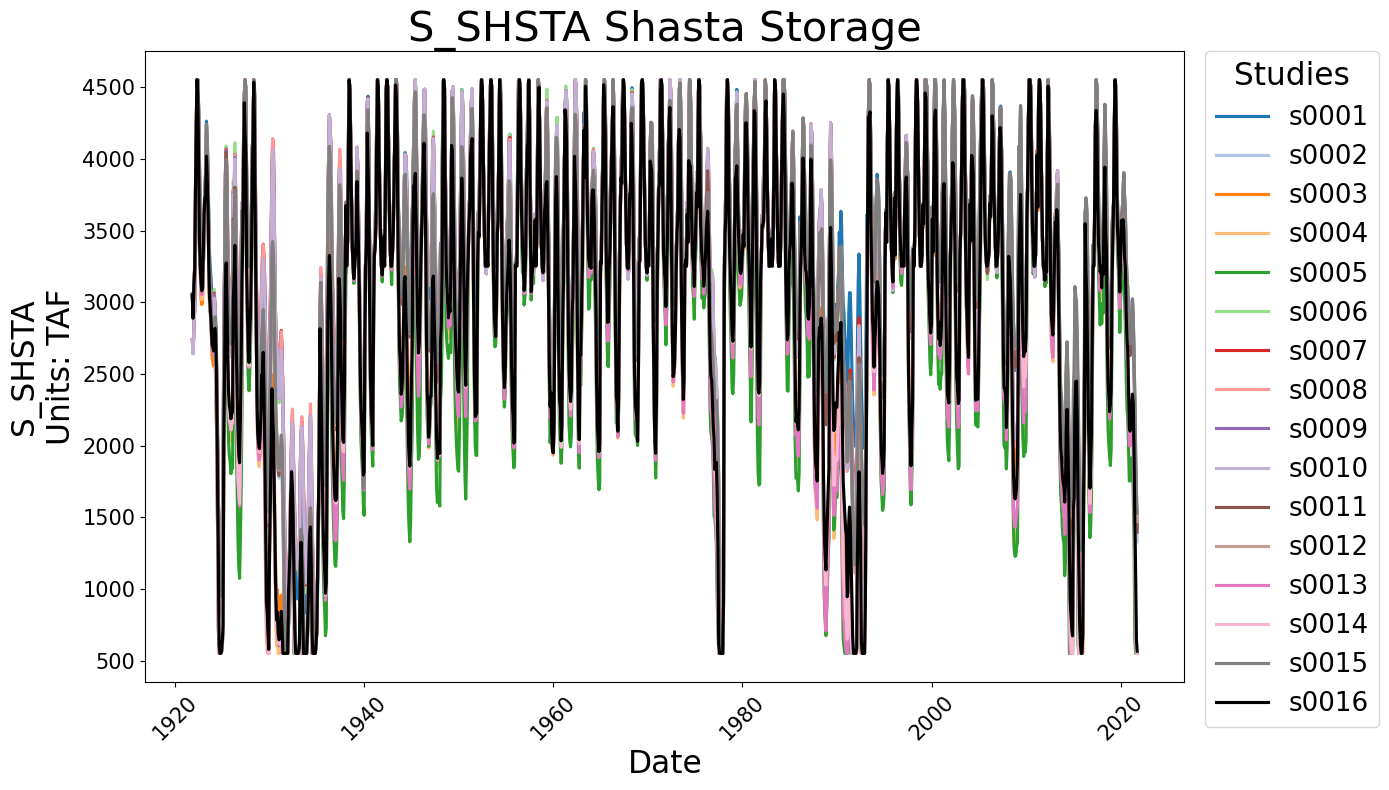

In [42]:
pu.plot_ts(
    shasta_taf_df,
    pTitle="Shasta Storage",
    xLab="Date",
    pSave=True,
    fPath=plots_path,
    fTitle="shasta_storage"
)

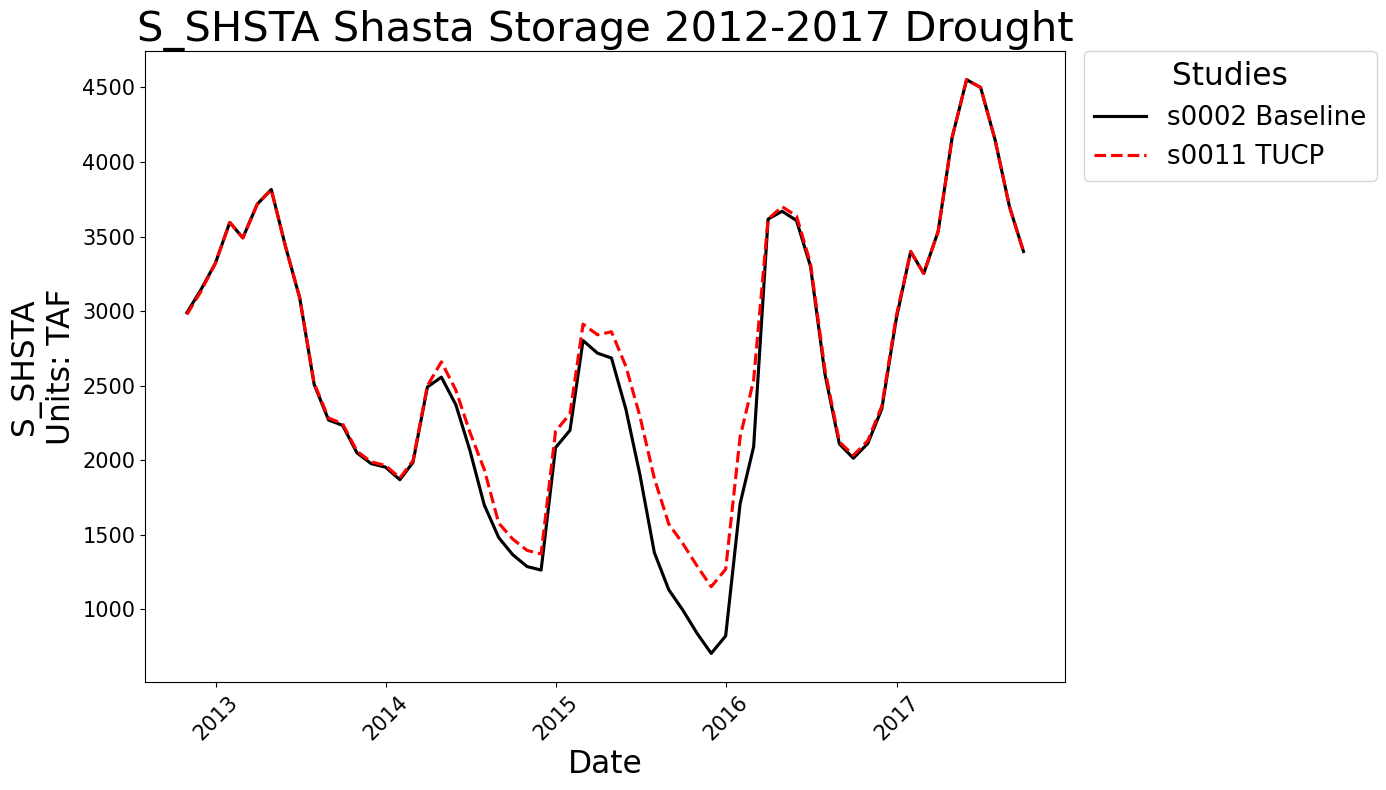

In [43]:
pu.plot_ts(
    shasta_taf_df,
    pTitle="Shasta Storage 2012-2017 Drought",
    xLab="Date",
    study_list=[2,11],
    start_date="2012-10-31",
    end_date="2017-09-30",
    scenario_styles=scenario_styles_baseline_tucp,
    pSave=True,
    fPath=plots_path,
    fTitle="shasta_storage_2012_2017"
)

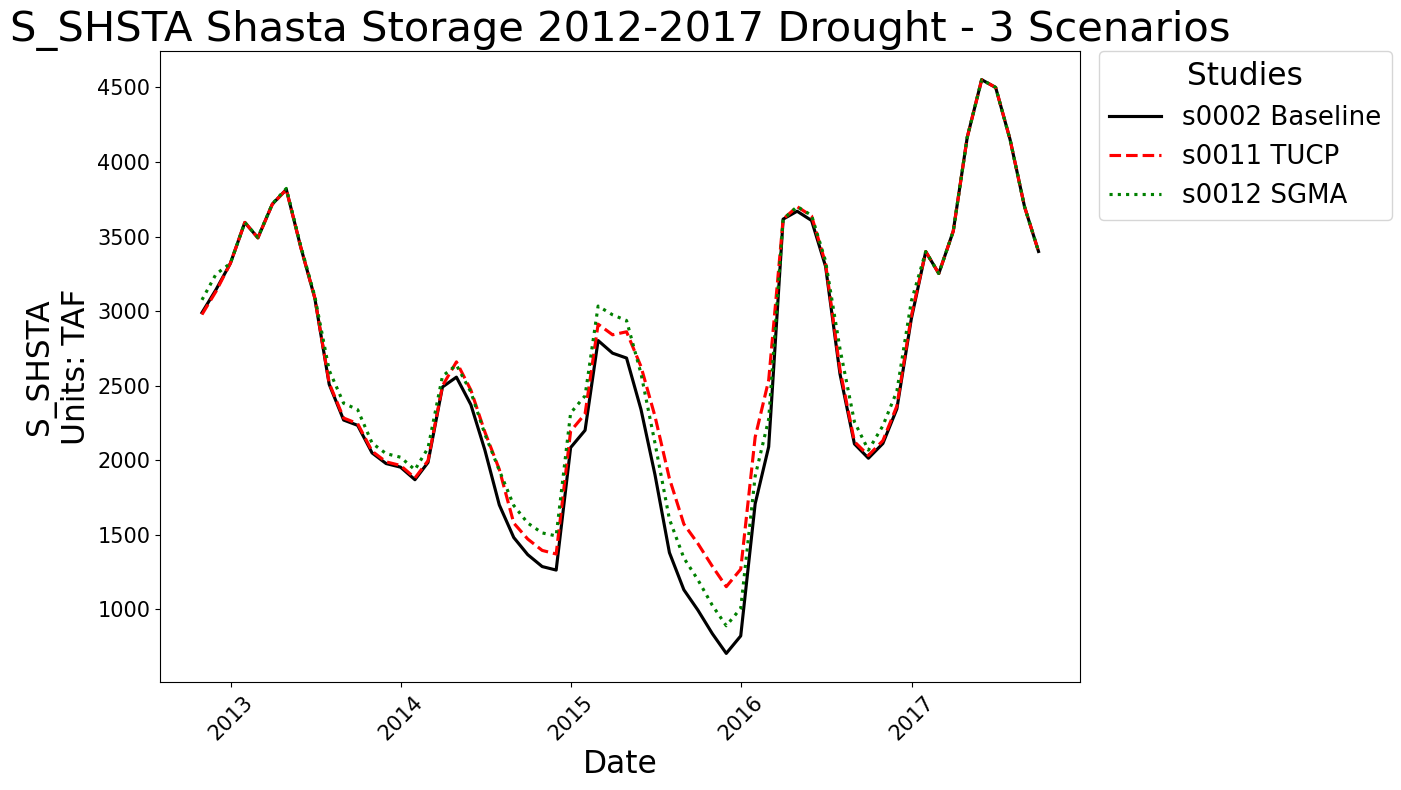

In [44]:
pu.plot_ts(
    shasta_taf_df,
    pTitle="Shasta Storage 2012-2017 Drought - 3 Scenarios",
    xLab="Date",
    study_list=[2,11,12],
    start_date="2012-10-31",
    end_date="2017-09-30",
    scenario_styles=scenario_styles_three,
    pSave=True,
    fPath=plots_path,
    fTitle="shasta_storage_2012_2017_three"
)

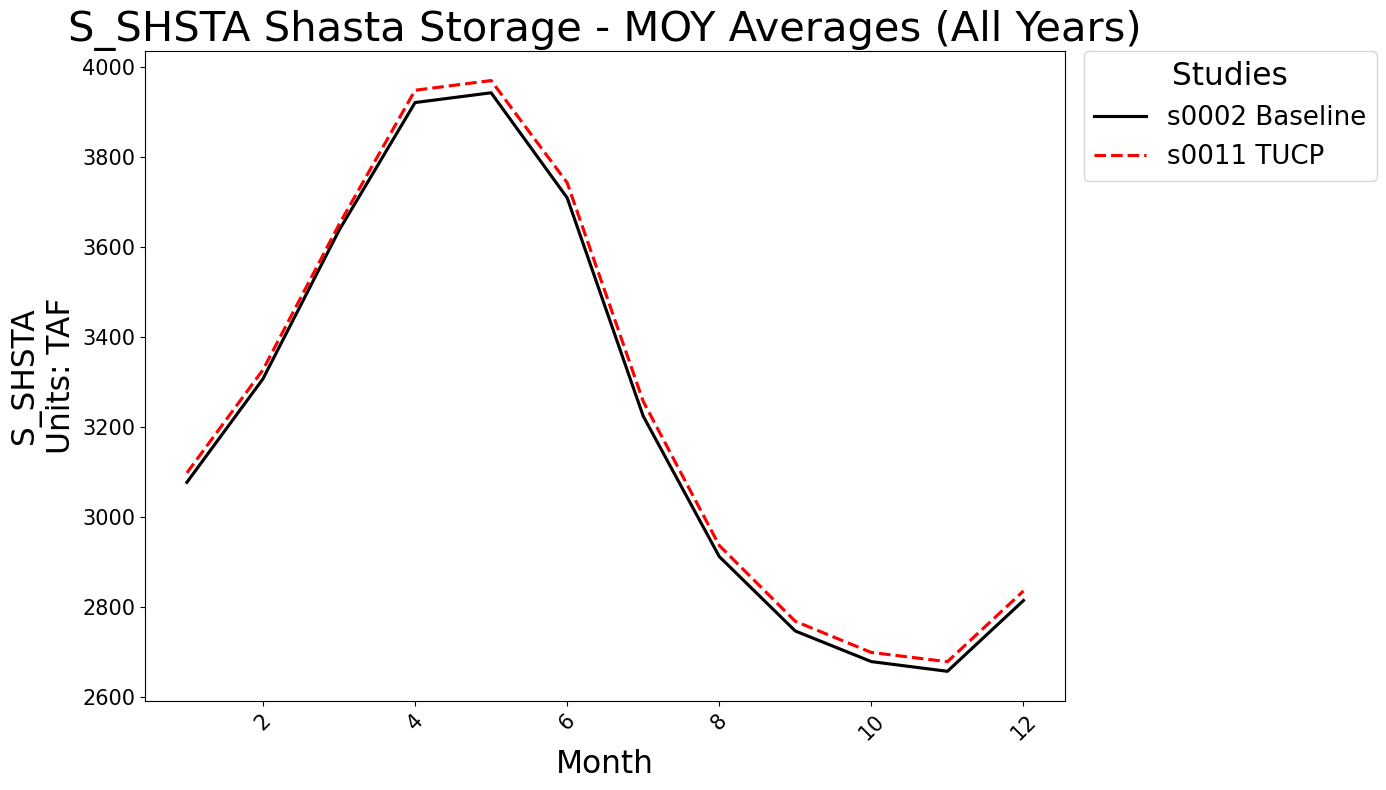

In [45]:
pu.plot_moy_averages(
    shasta_taf_df,
    xLab="Month",
    pTitle="Shasta Storage - MOY Averages (All Years)",
    study_list=[2,11],
    scenario_styles=scenario_styles_baseline_tucp,
    pSave=True,
    fPath=plots_path,
    fTitle="shasta_moy_all"
)

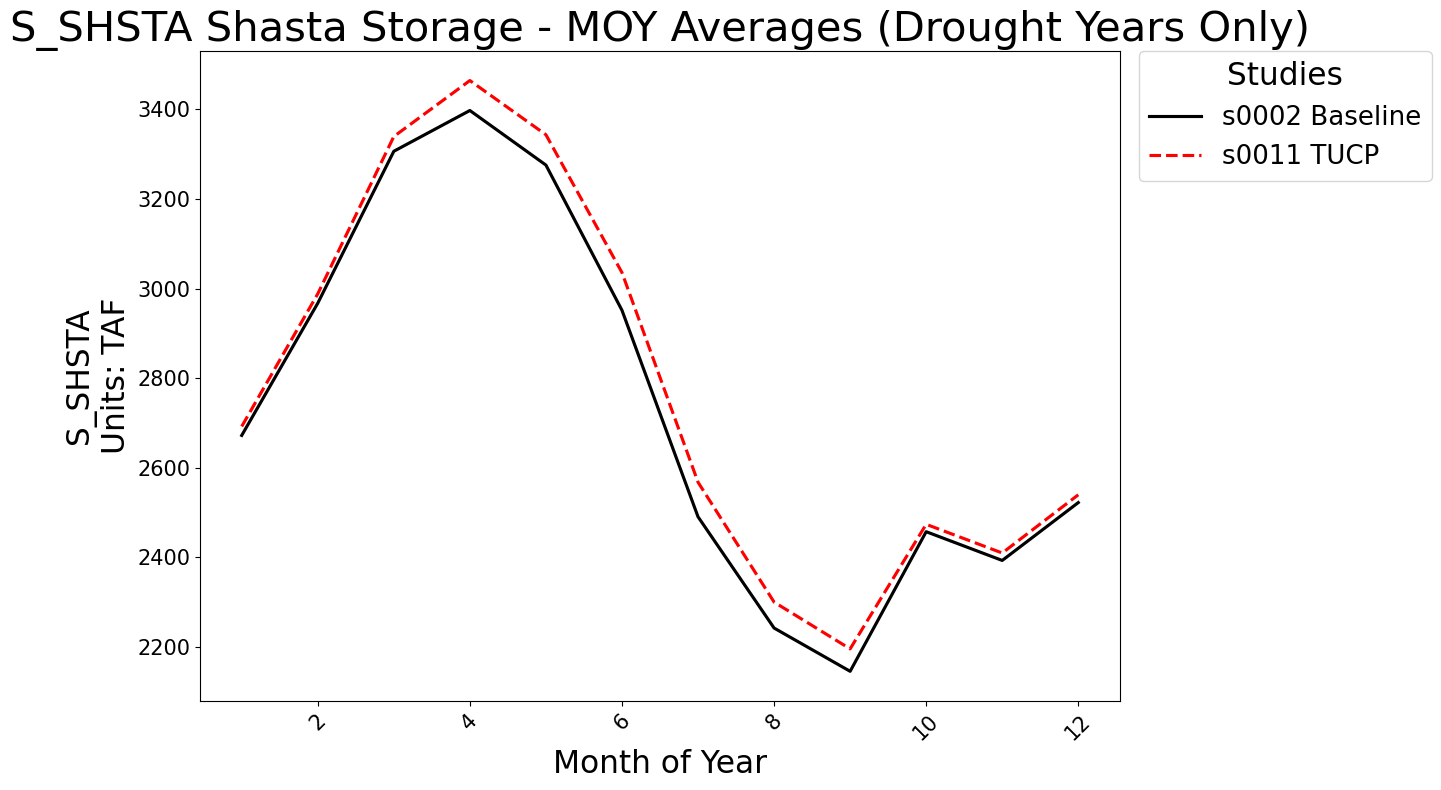

In [46]:
pu.plot_moy_averages(
    shasta_drought_df,
    pTitle="Shasta Storage - MOY Averages (Drought Years Only)",
    study_list=[2,11],
    scenario_styles=scenario_styles_baseline_tucp,
    pSave=True,
    fPath=plots_path,
    fTitle="shasta_moy_drought"
)

/Users/canruso/Desktop/COEQWAL_MAIN/coeqwal/notebooks/./coeqwalpackage/plotting.py:575: FutureWarning: 'AS-OCT' is deprecated and will be removed in a future version, please use 'YS-OCT' instead.
  df_annual = df_col.resample(freq).sum(min_count=1)
/Users/canruso/Desktop/COEQWAL_MAIN/coeqwal/notebooks/./coeqwalpackage/plotting.py:575: FutureWarning: 'AS-OCT' is deprecated and will be removed in a future version, please use 'YS-OCT' instead.
  df_annual = df_col.resample(freq).sum(min_count=1)


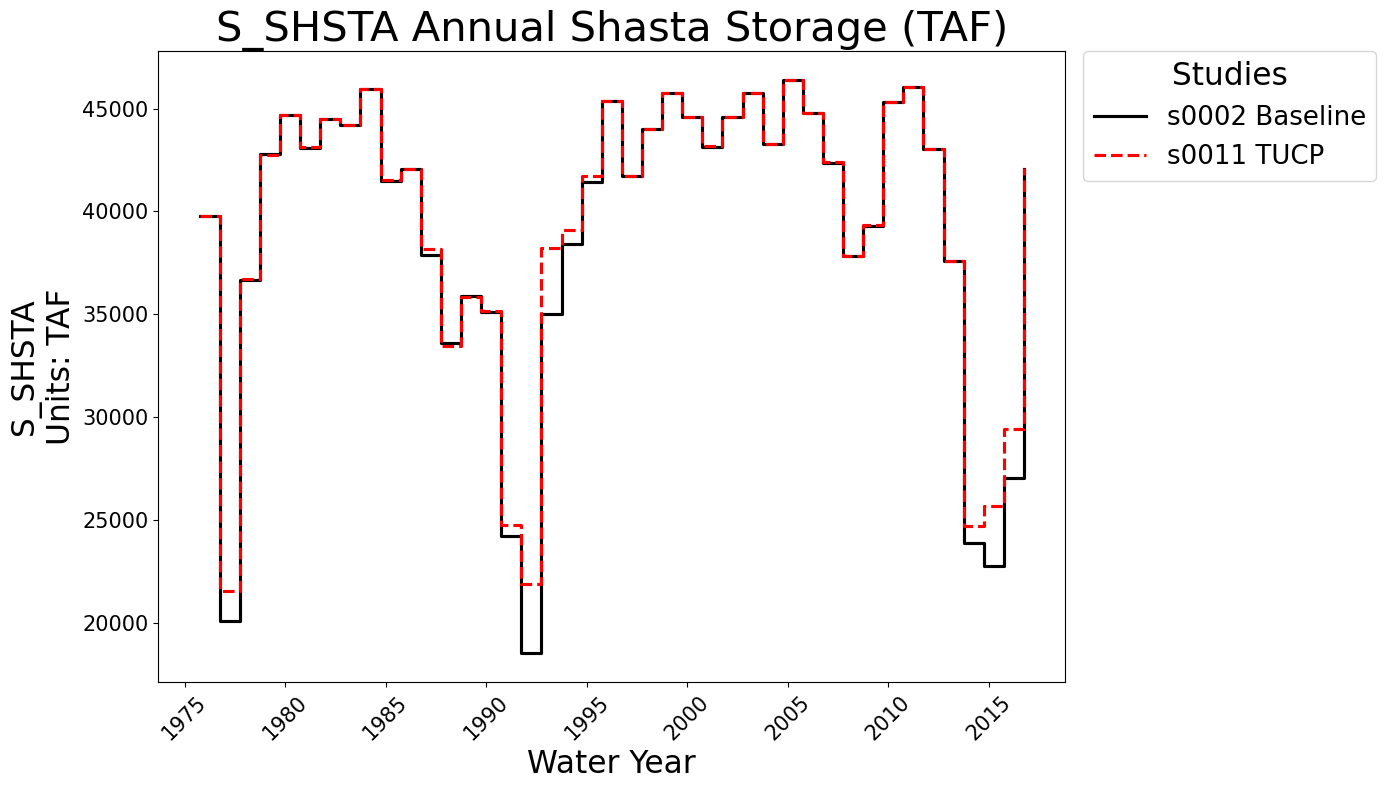

A                 CALSIM              
B          S_SHSTA_s0002 S_SHSTA_s0011
C                STORAGE       STORAGE
D                   1MON          1MON
E                 L2020A        L2020A
F               PER-AVER      PER-AVER
Units                TAF           TAF
1975-10-01   39771.67230   39790.12370
1976-10-01   20107.24991   21540.04267
1977-10-01   36690.11493   36713.32093
1978-10-01   42808.89150   42761.34950
1979-10-01   44663.49470   44666.77620
1980-10-01   43080.56200   43124.46100
1981-10-01   44480.52760   44489.51590
1982-10-01   44212.76880   44212.76880
1983-10-01   45966.72380   45967.90760
1984-10-01   41499.15640   41505.81500
1985-10-01   42041.23930   42052.64040
1986-10-01   37899.34140   38163.98850
1987-10-01   33584.03720   33446.45530
1988-10-01   35882.23300   35850.74920
1989-10-01   35120.76000   35147.27050
1990-10-01   24217.49320   24770.46550
1991-10-01   18519.23087   21885.80840
1992-10-01   35006.75610   38238.49690
1993-10-01   38436.10200   39081.77930
1994-10-01   41437.35600   41722.48430
1995-10-01   45367.03730   45367.95200
1996-10-01   41703.55880   41706.37320
1997-10-01   44003.38700   44006.80390
1998-10-01   45756.35220   45756.32360
1999-10-01   44589.63570   44590.35460
2000-10-01   43155.13050   43165.78920
2001-10-01   44588.07970   44599.39100
2002-10-01   45743.78460   45750.84060
2003-10-01   43268.32300   43275.31960
2004-10-01   46395.00700   46404.10780
2005-10-01   44785.10840   44784.34980
2006-10-01   42377.49310   42381.61770
2007-10-01   37819.57940   37822.06730
2008-10-01   39297.26480   39325.34470
2009-10-01   45305.34280   45313.38390
2010-10-01   46050.77880   46050.77880
2011-10-01   43039.69940   43056.37990
2012-10-01   37602.91110   37609.34310
2013-10-01   23871.15980   24697.67960
2014-10-01   22790.91006   25700.21770
2015-10-01   27057.31710   29440.81510
2016-10-01   42057.75800   42114.26160

In [49]:
pu.plot_annual_totals(
    shasta_taf_df,
    xLab="Water Year",
    pTitle="Annual Shasta Storage (TAF)",
    study_list=[2,11],
    start_date="1975-10-31",
    end_date="2017-09-30",
    scenario_styles=scenario_styles_baseline_tucp,
    pSave=True,
    fPath=plots_path,
    fTitle="shasta_annual_1975_2017"
)

/Users/canruso/Desktop/COEQWAL_MAIN/coeqwal/notebooks/./coeqwalpackage/plotting.py:535: FutureWarning: 'AS-OCT' is deprecated and will be removed in a future version, please use 'YS-OCT' instead.
  ann_col = one_col.resample(freq).sum(min_count=1)
/Users/canruso/Desktop/COEQWAL_MAIN/coeqwal/notebooks/./coeqwalpackage/plotting.py:535: FutureWarning: 'AS-OCT' is deprecated and will be removed in a future version, please use 'YS-OCT' instead.
  ann_col = one_col.resample(freq).sum(min_count=1)


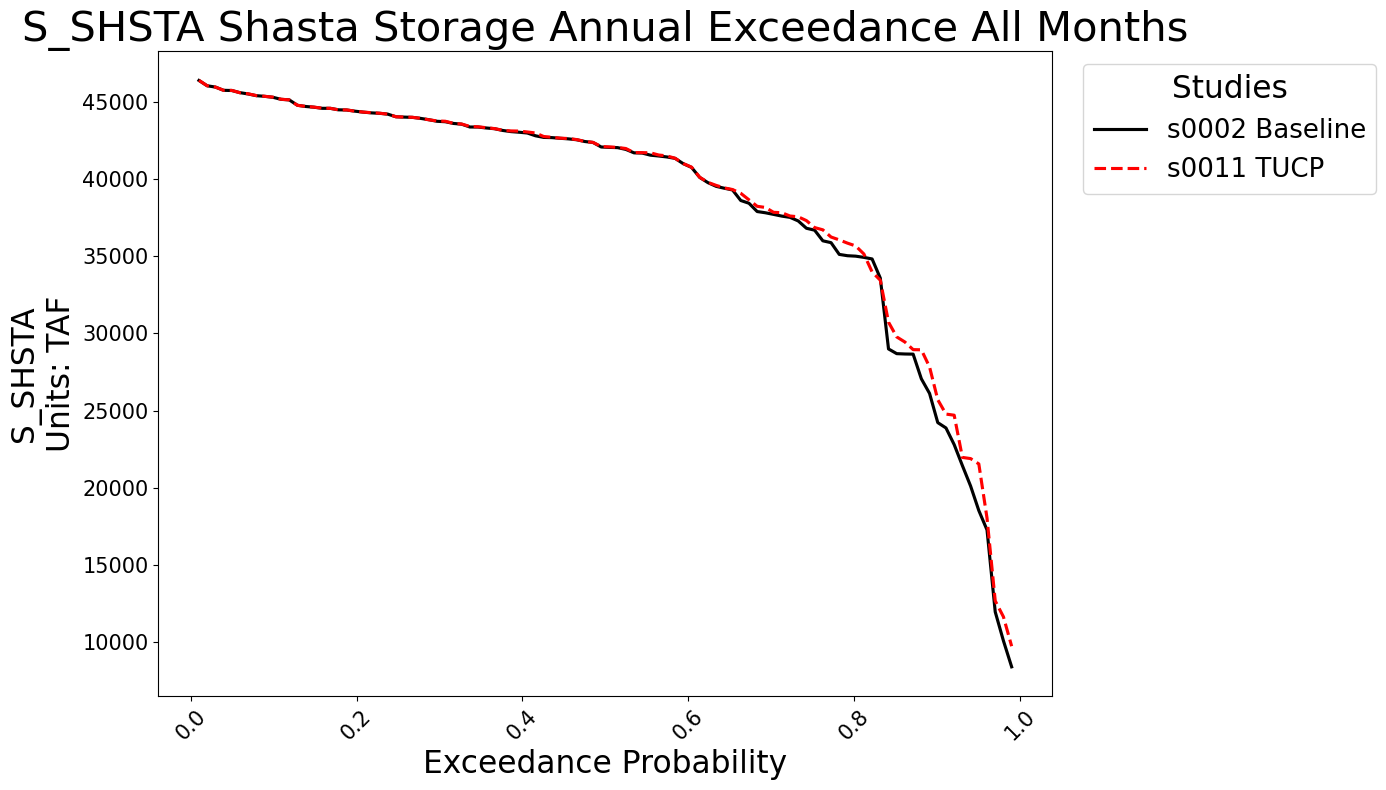

A                 CALSIM              
B          S_SHSTA_s0002 S_SHSTA_s0011
C                STORAGE       STORAGE
D                   1MON          1MON
E                 L2020A        L2020A
F               PER-AVER      PER-AVER
Units                TAF           TAF
1921-10-01   44019.75740    44019.9313
1922-10-01   42989.04200    42990.9184
1923-10-01   26109.76906    27826.0104
1924-10-01   28665.16836    30729.1531
1925-10-01   35035.59620    36247.6379
..                   ...           ...
2016-10-01   42057.75800    42114.2616
2017-10-01   41688.07590    41716.5186
2018-10-01   43376.07760    43392.0027
2019-10-01   41345.94680    41352.8729
2020-10-01   28687.33370    28937.0734

[100 rows x 2 columns]

In [48]:
pu.annualize_exceedance_plot(
    df,
    varname="S_SHSTA_",
    units="TAF",
    freq="AS-OCT",             
    pTitle="Shasta Storage Annual Exceedance",
    month="All Months",         
    xLab="Exceedance Probability",
    lTitle="Studies",
    fTitle="shasta_annual_exceed",
    pSave=True,
    fPath=plots_path,
    study_list=[2, 11],
    scenario_styles=scenario_styles_baseline_tucp
)